#### No4 (3 балла)
Скачайте датасет https://cloud.mail.ru/public/SAi2/M1AzFm7BC, в котором по дням
записаны календарная информация и погодные условия, характеризующие
автоматизированные пункты проката велосипедов, а также число прокатов в этот день (это
значение необходимо предсказывать).

Для каждого дня проката известны следующие признаки (как они были указаны в источнике
данных):
-  season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
-  yr: 0 - 2011, 1 - 2012
-  mnth: от 1 до 12
-  holiday: 0 - нет праздника, 1 - есть праздник
-  weekday: от 0 до 6
-  workingday: 0 - нерабочий день, 1 - рабочий день
-  weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень,
туман)
-  temp: температура в Цельсиях
-  atemp: температура по ощущениям в Цельсиях
-  hum: влажность
-  windspeed(mph): скорость ветра в милях в час
-  windspeed(ms): скорость ветра в метрах в секунду
-  cnt: количество арендованных велосипедов (это целевой признак, его мы будем
предсказывать)

Выполните следующие шаги:

1) Покажите на графиках, как целевой признак зависит от остальных. Каков характер
зависимости числа прокатов от месяца? Укажите один или два признака, от которых число прокатов скорее всего зависит линейно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv("csv/bikes_rent.csv")
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


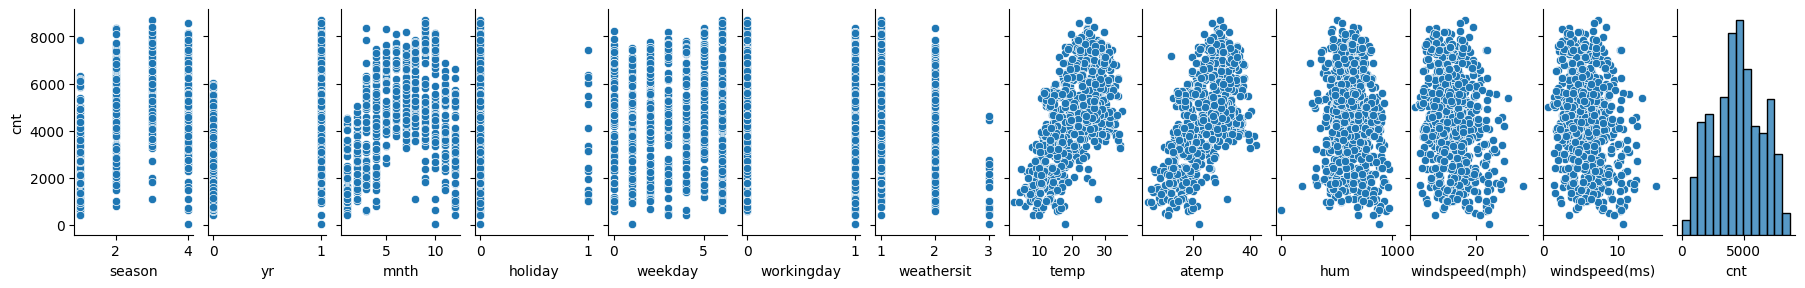

In [3]:
g = sb.pairplot(data=df, y_vars=["cnt"])
g.fig.set_size_inches(18, 3)
plt.show()


In [4]:
df.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


Характер зависимости числа прокатов от месяца: практически отсутствует

Признак, от которых число прокатов скорее всего зависит линейно: temp

2) Есть ли в данных похожие или дублирующие друг друга признаки? Как вы можете показать их похожесть? Удалите такие признаки из датасета.

Похожие признаки: temp, atemp

Дублирующие признаки: windspeed(mph), windspeed(ms)


In [5]:
df = df.drop(["atemp", "windspeed(mph)"], axis=1)


3) Разбейте данные на тренировочные и тестовые. Обучите модель линейной
регрессии. Выведите точность предсказания модели для тестовых данных.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [7]:
x = df.drop("cnt", axis=1)
y = df["cnt"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_test, y_test)


0.8231919187657435